In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
import os
from surface_dynamics.all import *
from Library import *
from Library import Section
import math
from time import time
import copy
from scipy import integrate
import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify
import traceback
import dill

In [2]:
# 7-0, 7-3, 7-7, 7-19, 7-29, 7-41
n_squares = 7
index = 1
j = 0
dx = 0.0005

In [3]:
permutations = perms_list(n_squares)
perm = permutations[index]

vec_file = "vecs" + str(n_squares) + "-" + str(index) + ".npy"
vecs0 = load_arrays_from_file(os.path.join("vecs", vec_file))

with open(os.path.join("results", f"{n_squares} - {index}", "setup.dill"), 'rb') as f:
    loaded_data = dill.load(f)
a,c,e,g = loaded_data

df = read_df(n_squares, index, j)

with open(os.path.join("results", f"{n_squares} - {index}", f"secs - {j}.dill"), 'rb') as f:
    secs = dill.load(f)

NameError: name 'print_secs' is not defined

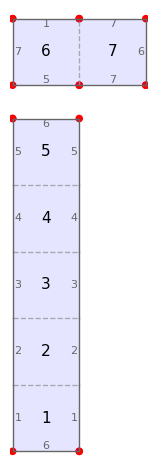

In [9]:
perm.show()

In [8]:
print_secs(secs)

1.
x0 = 2;
y0 = 1;

top = -2*x + 1;
bottomL = -3*x + 1;
left = 0;

--------------------------------------------------

2.
x0 = 1;
y0 = 1;

top = -1*x + 1;
bottomL = -2*x + 1;
left = 0;

--------------------------------------------------



In [ ]:
len(vecs0)

In [4]:
def print_secs(secs):
    j = 0
    for sec in secs:
        j+=1
        output = str(j) + ".\n"
        output = output + "x0 = " + str(simplify(sec.vec[0][0])) + ";\n"
        output = output + "y0 = " + str(simplify(sec.vec[1][0])) + ";\n"
        output = output + "\n"
        output = output + "top = " + str(simplify_eq(sec.top[0])) + ";\n"
        for i in range(len(sec.bottom)):
            if (i==0):
                output = output + "bottom" + str("L") + " = " + str(simplify_eq(sec.bottom[i])) + ";\n"
            else:
                output = output + "bottom" + str("R") + " = " + str(simplify_eq(sec.bottom[i])) + ";\n"
        if (i != 0):
            output = output + "point = " + str(simplify(sec.points_bottom[1])) + ";\n"
        output = output + "left = " + str(simplify(sec.points_bottom[0])) + ";\n"
        print(output)
        print("--------------------------------------------------\n")

In [6]:
def simplify_eq(expr):
    dict = expr.as_coefficients_dict()
    b = dict[1]
    m = dict[x]

    m1 = None
    b1 = None

    m_num = None
    m_den = None
    b_num = None
    b_den = None
    
    m_diff = 1
    b_diff = 1
    m_decimal = m - int(m)
    b_decimal = b - int(b)
    
    for i in range(10, 0, -1):
        for j in range(i+1):
            if(m < 0):
                m_result = abs(j/i + m_decimal)
            else:
                m_result = abs(j/i - m_decimal)

            if(b < 0):
                b_result = abs(j/i + b_decimal)
            else:
                b_result = abs(j/i - b_decimal)

            if(m_result <= m_diff):
                m_diff = m_result
                if (m < 0):
                    m_num = int(m)*i - j
                    m_den = i
                else:
                    m_num = int(m)*i + j
                    m_den = i

            if(b_result <= b_diff):
                b_diff = b_result
                if (b < 0):
                    b_num = int(b)*i - j
                    b_den = i
                else:
                    b_num = int(b)*i + j
                    b_den = i
                    
    if(m_den == 1):
        m1 = str(m_num)
    else:
        m1 = str(m_num) + "/" + str(m_den)

    if(b_den == 1):
        b1 = str(b_num)
    else:
        b1 = str(b_num) + "/" + str(b_den)
        
    return  m1 + "*x + " + b1

In [7]:
def simplify(m):

    m1 = None

    m_num = None
    m_den = None
    
    m_diff = 1
    m_decimal = m - int(m)
    
    for i in range(10, 0, -1):
        for j in range(i+1):
            if(m < 0):
                m_result = abs(j/i + m_decimal)
            else:
                m_result = abs(j/i - m_decimal)

            if(m_result <= m_diff):
                m_diff = m_result
                if (m < 0):
                    m_num = int(m)*i - j
                    m_den = i
                else:
                    m_num = int(m)*i + j
                    m_den = i
                    
    if(m_den == 1):
        m1 = str(m_num)
    else:
        m1 = str(m_num) + "/" + str(m_den)
        
    return  m1